# Tutorial 03

## 0 Review()

In [1]:
# 파이썬 코딩의 기본 3요소
# Data,  함수,  연결부호

In [2]:
# 01 Data

# 숫자 (integer)
# integer(정수) : index, slicing, counting
# float(실수) : 연산

# 문자 (string)
# 'datum' :  문자와 문자의 사칙연산,  Indexing/ Slicing,  Counting....
# data  :  매개변수
# .format( tuple )

# [ list ] :  integer index 값이 숨어있다. (0 ~ -1)
# enumerate()  : enumerate - 열거하다 , 차례로 들다

# { dict } :  { key : value }
# .items()

In [3]:
# 02 연결부호

# '' , ""  문자열 지정 (연산 불가능한 객체)
# . 종속   
# , 병렬나열
# : 내부설계
# = 입력

# is           # if 판단문
# == 대등조건
# != 부 대등조건
# in           # if 판단문, for 반복문
# not in

In [4]:
# 03 함수

# 반복문 : for, while, loop.....   
#     1.list. dict같은 반복 조건이 필요
#     2. 같은 조건/ 함수/ 내용을 반복
#     3. range( start, end, step )

# 판단문 : if    -  True / False
    
# [list 내부활용 함수문]

<p>출처 : http://pbpython.com/pandas-list-dict.html</p>
</br><img src = "http://pbpython.com/images/pandas-dataframe-shadow.png" align="left">

## 1 Pandas and Numpy
 - numpy : 엑셀의 내부 함수 모음 ( pandas의 메소드 함수역활)
 - pandas : 엑셀의 단축키 , sheets 등 부가기능 모음
 - 함께 뒤 섞여서 활용

In [5]:
# 1. Series
# 2. ndarray
# 3. Dataframe : 생성/ 변경 

## 2 'Series'  in Pandas 
일련, 연속 ,한벌 : list 의 확장

### 01 list 와 비교
list 를 바탕으로 Series 이해하기

In [6]:
lists = [4,2,-1,1,-2,-3,4,5]
lists

[4, 2, -1, 1, -2, -3, 4, 5]

In [7]:
# index 가 옆에 노출되었을 뿐 내용과 개념은 동일!!!
# 그럼에도 왜 쓰냐?? - 1) DataFrame과 호환성   
#                  2) Matrix 등의 연산시 "30배 속도"가 향상 (C++로 연산을 처리)
#                  3) matplotlib 모듈과 연동이 용이

import pandas as pd
data = pd.Series(lists)
data

0    4
1    2
2   -1
3    1
4   -2
5   -3
6    4
7    5
dtype: int64

In [8]:
data.index

RangeIndex(start=0, stop=8, step=1)

In [9]:
data.values

array([ 4,  2, -1,  1, -2, -3,  4,  5])

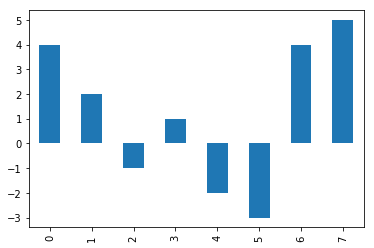

In [10]:
%matplotlib inline
data.plot(kind='bar')

### 02 dict 와 비교
dict 를 바탕으로 Series 이해하기

In [11]:
# index 에 임의의 이름을 부여 가능
# 그러면서도 순서 속성은 그대로 유지
data = pd.Series([4,7,-5,3], index = ['seoul', 'dajun', 'daegu','busan'])
data

seoul    4
dajun    7
daegu   -5
busan    3
dtype: int64

In [12]:
data.index

Index(['seoul', 'dajun', 'daegu', 'busan'], dtype='object')

In [13]:
data['seoul']

4

### 03 Series 의 함수적 속성
[ boolean 조건함수 ] 

In [14]:
data * 2

seoul     8
dajun    14
daegu   -10
busan     6
dtype: int64

In [15]:
data [ data > 5 ]

dajun    7
dtype: int64

In [16]:
# Series 가 제공하는 다양한 메소드를 활용가능
data.isnull()

seoul    False
dajun    False
daegu    False
busan    False
dtype: bool

In [17]:
data2 = pd.Series([-4,3,-5], index = ['dajun', 'daegu','busan'])
data + data2

busan   -2.0
daegu   -2.0
dajun    3.0
seoul    NaN
dtype: float64

In [18]:
data2.index = [1,2,3]
data2

1   -4
2    3
3   -5
dtype: int64

## Quiz

    range() 로 10부터 1까지 1씩 감소하는 [ list ] 를 만들고
    이를 Series 로 변환한 뒤, 
    line 차트로 시각화를 하라

In [19]:
# [ i    for i in range(10,0,-1)]

## 3 'DataFrame'  in Pandas 
Excel Sheet 의 모든 것!!!

### 01 Table 생성하기
Series , list --> DataFrame

In [20]:
pd.DataFrame(data)

,0
seoul,4
dajun,7
daegu,-5
busan,3


In [21]:
data3 = [10,9,8,7,6,5,7]
# Series, list 여러개를 1개의 Table로 구성하기
# 객체가 Series : index 가 일치하지 않아도 조합이 가능 (자동조절)            ex) data, data2
# 객체가 list   : index '길이'가 맞이야만 조합이 가능 (순서는 그대로 삽입)    ex) data3
#              : 컬럼의 모든 데이터를 일괄 처리에 용이 (주로 전처리 작업에 활용)

df = pd.DataFrame( {'first_col': data, 'second_col': data2 , 'third_col': data3 } )
df

/home/markbaum/Python/python36/lib/python3.6/site-packages/pandas/indexes/api.py:71: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


,first_col,second_col,third_col
seoul,4.0,NaN,10
dajun,7.0,NaN,9
daegu,-5.0,NaN,8
busan,3.0,NaN,7
1,NaN,-4.0,6
2,NaN,3.0,5
3,NaN,-5.0,7


### 02 Index
DataFrame 의 기본 틀 수정하기

In [22]:
# index 01 : index to Column
df = df.reset_index()
df

,index,first_col,second_col,third_col
0,seoul,4.0,NaN,10
1,dajun,7.0,NaN,9
2,daegu,-5.0,NaN,8
3,busan,3.0,NaN,7
4,1,NaN,-4.0,6
5,2,NaN,3.0,5
6,3,NaN,-5.0,7


In [23]:
# index 02 :  Column  to index
df = df.rename(columns={'index':'city'})
df = df.set_index('city')
df

,first_col,second_col,third_col
city,,,
seoul,4.0,NaN,10
dajun,7.0,NaN,9
daegu,-5.0,NaN,8
busan,3.0,NaN,7
1,NaN,-4.0,6
2,NaN,3.0,5
3,NaN,-5.0,7


In [24]:
# index 03 : 순서나열 숫자로
df.reset_index(drop =False, inplace=True)
df

,city,first_col,second_col,third_col
0,seoul,4.0,NaN,10
1,dajun,7.0,NaN,9
2,daegu,-5.0,NaN,8
3,busan,3.0,NaN,7
4,1,NaN,-4.0,6
5,2,NaN,3.0,5
6,3,NaN,-5.0,7


In [25]:
## Cell 에 내용 추가하기
df = df.set_index('city')
df.second_col['daegu'] = 7
df

/home/markbaum/Python/python36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,first_col,second_col,third_col
city,,,
seoul,4.0,NaN,10
dajun,7.0,NaN,9
daegu,-5.0,7.0,8
busan,3.0,NaN,7
1,NaN,-4.0,6
2,NaN,3.0,5
3,NaN,-5.0,7


In [26]:
# table 의  index , column 의 이름들은 고유한 값들로
# index 이름은 바로 변경 삭제 추가가 되지 않는다.
# df.index[4] = 9

## Solution
 1. index 를 column 으로 뽑아낸 뒤, 수정 후 index 로 새로 지정한다.
 2. index 를 [ list ] 로 추출 후, 수정한 뒤 수정된 list 를 index 로 덧붙인다.

https://stackoverflow.com/questions/40427943/how-do-i-change-a-single-index-value-in-pandas-dataframe

In [27]:
df

,first_col,second_col,third_col
city,,,
seoul,4.0,NaN,10
dajun,7.0,NaN,9
daegu,-5.0,7.0,8
busan,3.0,NaN,7
1,NaN,-4.0,6
2,NaN,3.0,5
3,NaN,-5.0,7


In [28]:
# index 삭제
df.drop(3, axis = 0)

,first_col,second_col,third_col
city,,,
seoul,4.0,NaN,10
dajun,7.0,NaN,9
daegu,-5.0,7.0,8
busan,3.0,NaN,7
1,NaN,-4.0,6
2,NaN,3.0,5


## Quiz 
위의 df 자료의 1번 index 를 'jeju' 로 수정하라

In [29]:
df_index = df.index.tolist()
df_index[4] = 'Jeju'
df_index

['seoul', 'dajun', 'daegu', 'busan', 'Jeju', 2, 3]

In [30]:
df.index = df_index
df

,first_col,second_col,third_col
seoul,4.0,NaN,10
dajun,7.0,NaN,9
daegu,-5.0,7.0,8
busan,3.0,NaN,7
Jeju,NaN,-4.0,6
2,NaN,3.0,5
3,NaN,-5.0,7


### 03 Columns
DataFrame 의 Columns 바꾸기 및 재정렬

In [31]:
df = df.reset_index()
df

,index,first_col,second_col,third_col
0,seoul,4.0,NaN,10
1,dajun,7.0,NaN,9
2,daegu,-5.0,7.0,8
3,busan,3.0,NaN,7
4,Jeju,NaN,-4.0,6
5,2,NaN,3.0,5
6,3,NaN,-5.0,7


In [32]:
# column 이름 변경 1 - 수정할 내용이 적을 떄
df.rename(columns={ 'level_0' : '도시명' , 'first_col':'보건소' , 'second_col':'경찰서', 'third_col':'도서관'})

,index,보건소,경찰서,도서관
0,seoul,4.0,NaN,10
1,dajun,7.0,NaN,9
2,daegu,-5.0,7.0,8
3,busan,3.0,NaN,7
4,Jeju,NaN,-4.0,6
5,2,NaN,3.0,5
6,3,NaN,-5.0,7


In [33]:
# column 이름 변경 2 - 수정할 내용이 많을 떄
rename = ['도시', 'index', '보건소', '경찰서', '도서관']

result = {}
for i in range(len(df.columns)):
    result[df.columns[i]] = rename[i]

df.rename(columns=result)

,도시,index,보건소,경찰서
0,seoul,4.0,NaN,10
1,dajun,7.0,NaN,9
2,daegu,-5.0,7.0,8
3,busan,3.0,NaN,7
4,Jeju,NaN,-4.0,6
5,2,NaN,3.0,5
6,3,NaN,-5.0,7


In [34]:
# column 생성
# 동일한 객체로 column 채우며 생성
df['Year'] = '2017'
df

,index,first_col,second_col,third_col,Year
0,seoul,4.0,NaN,10,2017
1,dajun,7.0,NaN,9,2017
2,daegu,-5.0,7.0,8,2017
3,busan,3.0,NaN,7,2017
4,Jeju,NaN,-4.0,6,2017
5,2,NaN,3.0,5,2017
6,3,NaN,-5.0,7,2017


In [35]:
# column 삭제
df = df.drop('Year', axis = 1)
df

,index,first_col,second_col,third_col
0,seoul,4.0,NaN,10
1,dajun,7.0,NaN,9
2,daegu,-5.0,7.0,8
3,busan,3.0,NaN,7
4,Jeju,NaN,-4.0,6
5,2,NaN,3.0,5
6,3,NaN,-5.0,7


In [36]:
# column 생성2
# 동일한 객체로 column 채우며 생성

df.insert(0,'Year', '2017')
df

,Year,index,first_col,second_col,third_col
0,2017,seoul,4.0,NaN,10
1,2017,dajun,7.0,NaN,9
2,2017,daegu,-5.0,7.0,8
3,2017,busan,3.0,NaN,7
4,2017,Jeju,NaN,-4.0,6
5,2017,2,NaN,3.0,5
6,2017,3,NaN,-5.0,7


In [37]:
# https://stackoverflow.com/questions/25478773/creating-a-list-with-data-from-a-dataframe-index-in-python
date_list = pd.date_range('2017-7-1','2017-7-7').tolist()  # a list of Timestamp's
date_list = [ ts.date() for ts in date_list ]  # a list of datetime.date's
date_list = [ str(date)  for date in date_list ]
date_list

['2017-07-01',
 '2017-07-02',
 '2017-07-03',
 '2017-07-04',
 '2017-07-05',
 '2017-07-06',
 '2017-07-07']

In [38]:
# [ list ] 객체로 column을 채우며 생성
# 단 '자료의 길이' 가 동일해야 한다 (아니면 오류가 발생!!!)

df.insert(1,'Date',date_list)
df

,Year,Date,index,first_col,second_col,third_col
0,2017,2017-07-01,seoul,4.0,NaN,10
1,2017,2017-07-02,dajun,7.0,NaN,9
2,2017,2017-07-03,daegu,-5.0,7.0,8
3,2017,2017-07-04,busan,3.0,NaN,7
4,2017,2017-07-05,Jeju,NaN,-4.0,6
5,2017,2017-07-06,2,NaN,3.0,5
6,2017,2017-07-07,3,NaN,-5.0,7


## Quiz
아래 테이블에서 
'Today' 란 컬럼에 '오늘의 날짜'를 입력하는 테이블로 수정하시요

In [39]:
pd.DataFrame({'Data':[1,2,3,4,5],
             'Qusetion':['A','B','C','D','E'],
             'Answer':['X', 'Y', 'Z','Q','P']})

,Answer,Data,Qusetion
0,X,1,A
1,Y,2,B
2,Z,3,C
3,Q,4,D
4,P,5,E


## 4 'DataFrame'  가공하기
Slicing, Indexing, Reranging......

In [40]:
# Numpy 를 활용시작
# Pandas 와 같이 2차원 데이터를 생산, 가공이 가능
import pandas as pd
import numpy as np

In [41]:
np.random.rand(9)

array([ 0.15303199,  0.84422918,  0.14100023,  0.45900389,  0.31798817,
        0.68860504,  0.25164273,  0.31591967,  0.48509576])

In [42]:
pd.DataFrame(np.random.rand(9))

,0
0,0.481349
1,0.606595
2,0.580051
3,0.531856
4,0.334803
5,0.266100
6,0.637332
7,0.101985
8,0.428323


In [43]:
np.random.rand(20).reshape(5,4)

array([[ 0.46917701,  0.56997961,  0.34682959,  0.60852439],
       [ 0.750844  ,  0.61952133,  0.51884429,  0.9414849 ],
       [ 0.16879879,  0.80282851,  0.81870536,  0.67989559],
       [ 0.2697973 ,  0.98276124,  0.05446704,  0.96207191],
       [ 0.80972668,  0.38861084,  0.96871855,  0.40054013]])

In [44]:
df = pd.DataFrame(np.random.rand(30).reshape(6,5), 
             columns=['Kospi','Kosdq','MSFT','Nasdaq','China'],
             index = ['2012','2013','2014','2015','2016','2017'])
df

,Kospi,Kosdq,MSFT,Nasdaq,China
2012,0.748813,0.796145,0.222479,0.851656,0.705446
2013,0.637594,0.640663,0.492448,0.011152,0.386737
2014,0.588725,0.792860,0.931203,0.442577,0.089728
2015,0.259606,0.863481,0.513232,0.813215,0.137709
2016,0.832826,0.625657,0.101762,0.233635,0.841403
2017,0.233664,0.255017,0.104605,0.964051,0.929537


In [45]:
df.columns

Index(['Kospi', 'Kosdq', 'MSFT', 'Nasdaq', 'China'], dtype='object')

In [46]:
df.columns.tolist()

['Kospi', 'Kosdq', 'MSFT', 'Nasdaq', 'China']

In [47]:
df.index

Index(['2012', '2013', '2014', '2015', '2016', '2017'], dtype='object')

In [48]:
df.index.tolist()

['2012', '2013', '2014', '2015', '2016', '2017']

In [49]:
# DataFrame 에서 Column이 가장 중요
# df 의 메서드(함수) 로 작동
df.Kosdq

2012    0.796145
2013    0.640663
2014    0.792860
2015    0.863481
2016    0.625657
2017    0.255017
Name: Kosdq, dtype: float64

In [50]:
# df[ 컬럼명 ] 해당 column 의 자료를 출력
df['Kospi']

2012    0.748813
2013    0.637594
2014    0.588725
2015    0.259606
2016    0.832826
2017    0.233664
Name: Kospi, dtype: float64

In [51]:
# df[ :slicing] 은 index 만 영향 
# slicing - string 의 문법들이 그대로 적용
df[:3]

,Kospi,Kosdq,MSFT,Nasdaq,China
2012,0.748813,0.796145,0.222479,0.851656,0.705446
2013,0.637594,0.640663,0.492448,0.011152,0.386737
2014,0.588725,0.792860,0.931203,0.442577,0.089728


In [52]:
df.reset_index()

,index,Kospi,Kosdq,MSFT,Nasdaq,China
0,2012,0.748813,0.796145,0.222479,0.851656,0.705446
1,2013,0.637594,0.640663,0.492448,0.011152,0.386737
2,2014,0.588725,0.792860,0.931203,0.442577,0.089728
3,2015,0.259606,0.863481,0.513232,0.813215,0.137709
4,2016,0.832826,0.625657,0.101762,0.233635,0.841403
5,2017,0.233664,0.255017,0.104605,0.964051,0.929537


In [53]:
#df[] : 1) 컬럼명
#       2) slicing - 1차원적 slicing 만 가능

# Index Location 
df.iloc[ : , : ]

,Kospi,Kosdq,MSFT,Nasdaq,China
2012,0.748813,0.796145,0.222479,0.851656,0.705446
2013,0.637594,0.640663,0.492448,0.011152,0.386737
2014,0.588725,0.792860,0.931203,0.442577,0.089728
2015,0.259606,0.863481,0.513232,0.813215,0.137709
2016,0.832826,0.625657,0.101762,0.233635,0.841403
2017,0.233664,0.255017,0.104605,0.964051,0.929537


In [54]:
df.iloc[:, :3]

,Kospi,Kosdq,MSFT
2012,0.748813,0.796145,0.222479
2013,0.637594,0.640663,0.492448
2014,0.588725,0.792860,0.931203
2015,0.259606,0.863481,0.513232
2016,0.832826,0.625657,0.101762
2017,0.233664,0.255017,0.104605


In [55]:
# 일부분만 별도로 관리하기
df_sum = df.iloc[3:, :3]
df_sum

,Kospi,Kosdq,MSFT
2015,0.259606,0.863481,0.513232
2016,0.832826,0.625657,0.101762
2017,0.233664,0.255017,0.104605


## 5 'DataFrame' 계층적 index / columns
level index/ columns ......

### 01 계층적 Index
index 를 묶음으로 정렬하기

In [56]:
from pandas import DataFrame, Series
import numpy as np
data = Series(np.random.randn(10), 
              index=[ ['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'd', 'd'] ,
                     [1,2,3,1,2,3,1,2,2,3] ] )
data

a  1   -0.684807
   2    1.546559
   3   -1.508159
b  1   -0.762728
   2    0.382403
   3    0.050697
c  1    0.411511
   2    2.145584
d  2    1.532236
   3    0.649402
dtype: float64

In [57]:
data.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 1, 2, 0, 1, 1, 2]])

In [58]:
# 계층적 인덱스로의 접근
data['b']

1   -0.762728
2    0.382403
3    0.050697
dtype: float64

In [59]:
data['b':'c']

b  1   -0.762728
   2    0.382403
   3    0.050697
c  1    0.411511
   2    2.145584
dtype: float64

In [60]:
data.ix[['b', 'd']]

b  1   -0.762728
   2    0.382403
   3    0.050697
d  2    1.532236
   3    0.649402
dtype: float64

In [61]:
# 2번쨰 컬럼을 기준으로 출력
data[:, 2]

a    1.546559
b    0.382403
c    2.145584
d    1.532236
dtype: float64

In [62]:
# .unstack : 데이터를 새롭게 배열
data.unstack()

,1,2,3
a,-0.684807,1.546559,-1.508159
b,-0.762728,0.382403,0.050697
c,0.411511,2.145584,NaN
d,NaN,1.532236,0.649402


In [63]:
# 
data.unstack().stack()

a  1   -0.684807
   2    1.546559
   3   -1.508159
b  1   -0.762728
   2    0.382403
   3    0.050697
c  1    0.411511
   2    2.145584
d  2    1.532236
   3    0.649402
dtype: float64

### 02 계층적 index & column
계층적 index 와 계층적 column 모두 생성하기

In [64]:
# 두개의 축에서 계층적 색인 만들기
df = DataFrame(np.arange(12).reshape((4,3)),
                  index=[['a', 'a', 'b', 'b'], [1,2,1,2]],  # 상위인덱스, 하위인덱스
                  columns=[['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']])  # 상위컬럼, 하위컬럼
df

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [65]:
# 계층별 이름 지정 (층별 관리에 용이하다)
df.index.names=['key1', 'key2']
df.columns.names=['state', 'color']
df

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [66]:
# df['상위컬럼']['하위컬럼'] 
# 순차적 indexing
df['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [67]:
# 계층순서 바꾸기 - index
# 계층의 이름과, axis 축설정이 모두 일치해야 변환
df.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [68]:
# 계층순서 바꾸기 - columns
# 계층의 이름과, axis 축설정이 모두 일치해야 변환
df.swaplevel('state','color', axis=1)

color     Green  Red    Green
state      Ohio Ohio Colorado
key1 key2                    
a    1        0    1        2
     2        3    4        5
b    1        6    7        8
     2        9   10       11

In [69]:
# 계층정렬 - index
# 1번 index(default) 를 기준으로 오름차순(default) 정렬
df.sortlevel(1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [70]:
# 계층정렬 - columns
# 0 번 column을(axis=1) 내림차순(ascending=False) 정렬
df.sortlevel(0, axis=1, ascending=False)

state     Ohio       Colorado
color      Red Green    Green
key1 key2                    
a    1       1     0        2
     2       4     3        5
b    1       7     6        8
     2      10     9       11

In [71]:
# 계층정렬 
# index 0번 기준 오름차순, column 0번 기준 오름차순
df.swaplevel(0).sortlevel(0,1)

state     Colorado  Ohio    
color        Green Green Red
key2 key1                   
1    a           2     0   1
2    a           5     3   4
1    b           8     6   7
2    b          11     9  10

In [72]:
# index 단계별 요약 (합계로 요약하기)
df.sum(level='key2')

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [73]:
# columns 단계별 요약 (합계로 요약하기)
df.sum(level='color', axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

### 03 행 또는 열의 기준을 뒤바꾸기
column <--> index

In [74]:
# 행또는 열의 기준을 뒤바꾸는 방법
df = DataFrame({'a':range(7),
                'b': range(7, 0, -1),
                'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'],
                'd': [0,1,2,0,1,2,3]})
df

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [75]:
# 칼럼을 명시적으로 남겨두지 않으면 삭제됨
df.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [76]:
# column --> index
df2 = df.set_index(['c', 'd'])
df2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [77]:
# reset_index는 set_index와 반대되는 개념으로 색인이 칼럼으로 이동
# index --> column
df2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1
